# Exercise
Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
import numpy as np
import requests

from datetime import timedelta, datetime

import seaborn as sns
import matplotlib.pyplot as plt

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

import acquire as a

import matplotlib as mpl

plt.ion()

In [2]:
plt.rc('figure', figsize=(13, 6))
plt.rc('axes.spines', top=False, right=False)
plt.rc('font', size=13)

In [3]:
df = pd.read_csv('retail_df.csv')

In [4]:
df.drop(columns=['Unnamed: 0', 'item', 'store'], inplace=True)

In [5]:
# set sale_date column to datetime format
df.sale_date = pd.to_datetime(df.sale_date)

In [6]:
# Set index
df = df.set_index('sale_date').sort_index()

In [7]:
df['sales_total'] = df.sale_amount * df.item_price

<AxesSubplot:xlabel='sale_date'>

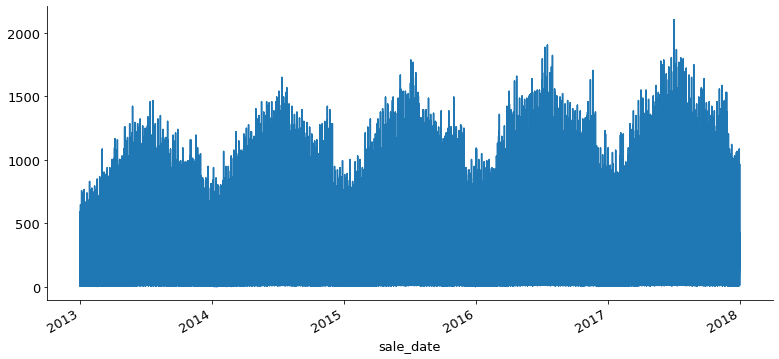

In [8]:
df.sales_total.plot()

sale_date
2013-01-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-02-28 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-03-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-04-30 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-05-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-06-30 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-07-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-08-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-09-30 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-10-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-11-30 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2013-12-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2014-01-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2014-02-28 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2014-03-31 00:00:00+00:00    AxesSubplot(0.125,0.2;0.775x0.68)
2014-04-30 00:00:00+00:00    AxesSubplot(0.12

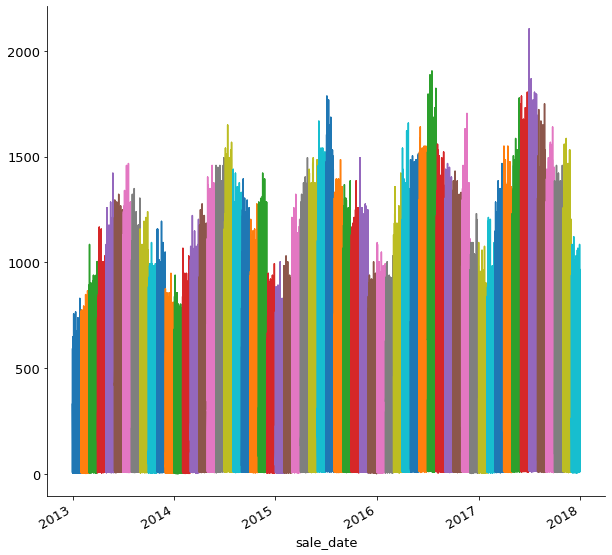

In [9]:
plt.figure(figsize=(10,10))
df.resample('M').sales_total.plot()

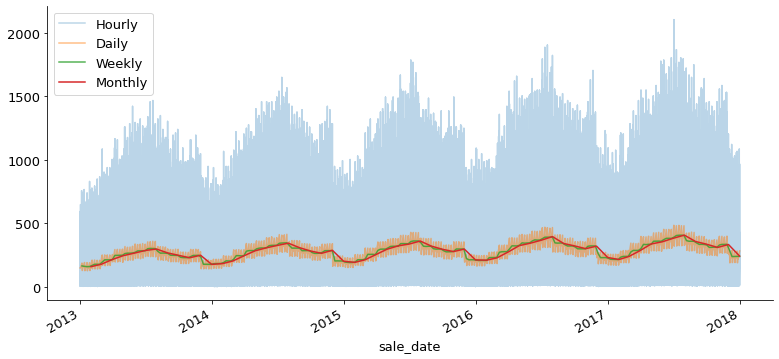

In [10]:
ax = df.sales_total.plot(alpha=.3, label='Hourly')
df.resample('D').sales_total.mean().plot(ax=ax, alpha=.5, label='Daily')
df.resample('W').sales_total.mean().plot(ax=ax, alpha=.8, label='Weekly')
df.resample('M').sales_total.mean().plot(ax=ax, label='Monthly')
ax.legend()

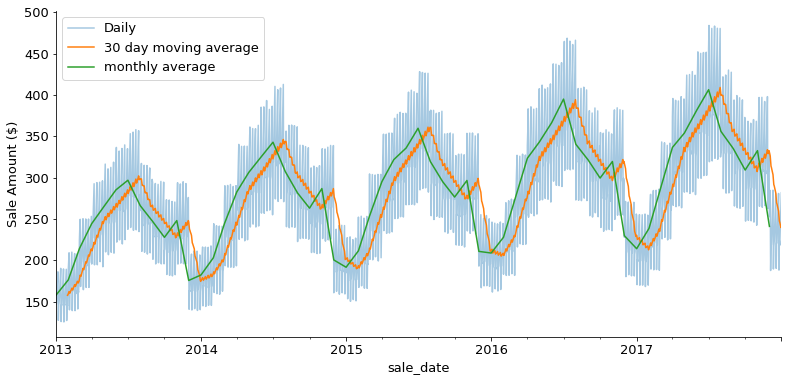

In [11]:
ax = df.resample('D').sales_total.mean().plot(label='Daily', alpha=.4)
df.resample('D').sales_total.mean().rolling(30).mean().plot(ax=ax, label='30 day moving average')
df.resample('M').sales_total.mean().plot(ax=ax, label='monthly average')
plt.ylabel('Sale Amount ($)')
ax.legend()

In [12]:
def autocorrelation(s, lag):
    return pd.concat([s, s.shift(lag)], axis=1).dropna().corr().iloc[0, 1]

In [13]:
autocorrelation(df.sales_total, 1)

0.09089062510499221

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

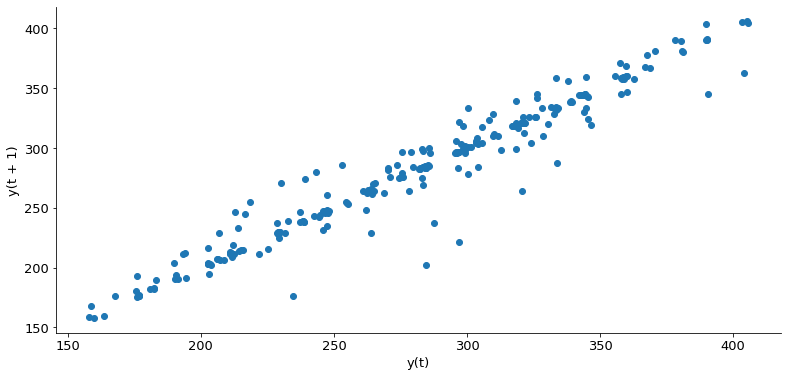

In [14]:
pd.plotting.lag_plot(df.resample('W').sales_total.mean(), 1)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

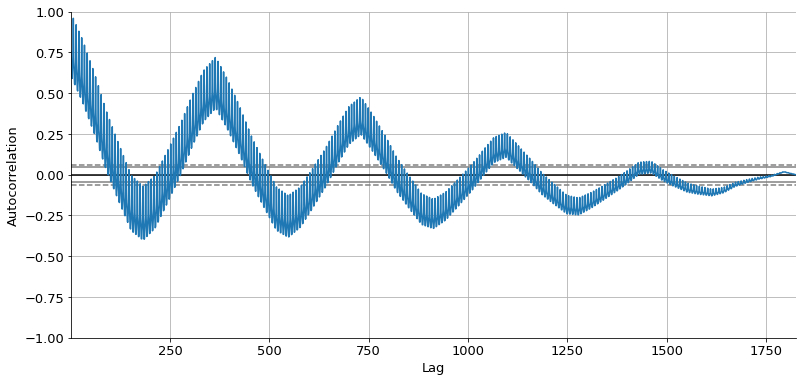

In [15]:
pd.plotting.autocorrelation_plot(df.resample('D').sales_total.mean())

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

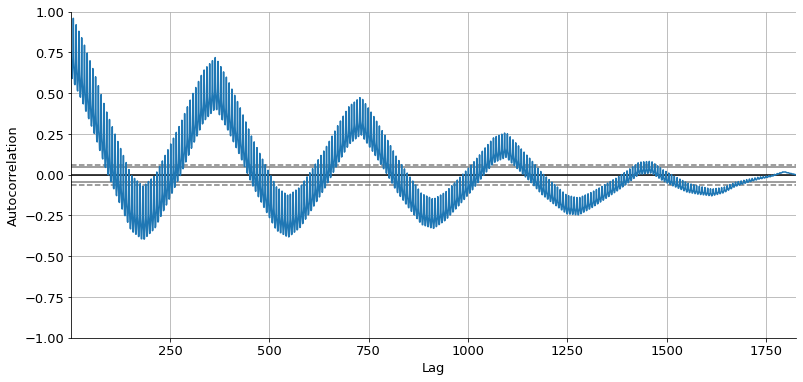

In [16]:
pd.plotting.autocorrelation_plot(df.resample('D').sale_amount.mean())

In [17]:
df.head()

,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,10.92
2013-01-01 00:00:00+00:00,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,26.0,295813,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,30.16
2013-01-01 00:00:00+00:00,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,32.0,125995,8503 NW Military Hwy,San Antonio,10,TX,78231,308.48
2013-01-01 00:00:00+00:00,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,45.0,314073,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,197.55
2013-01-01 00:00:00+00:00,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,34.0,332333,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,25.16


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

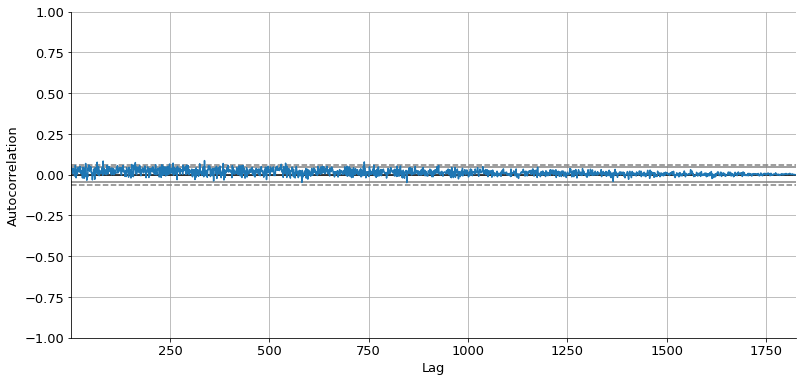

In [18]:
pd.plotting.autocorrelation_plot(df.resample('D').item_price.mean())

<AxesSubplot:xlabel='sale_date'>

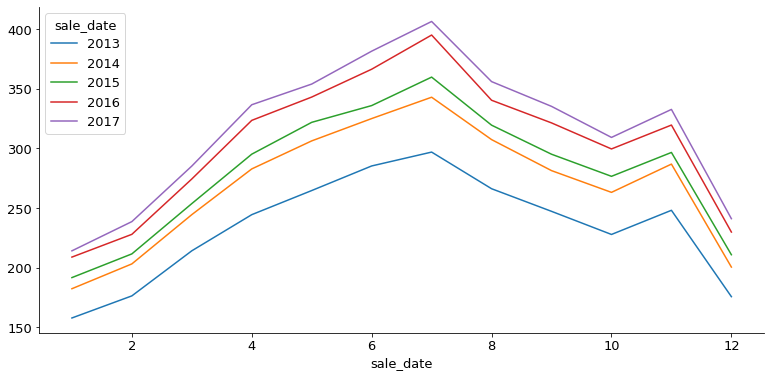

In [19]:
df.groupby([df.index.year, df.index.month]).sales_total.mean().unstack(0).plot()

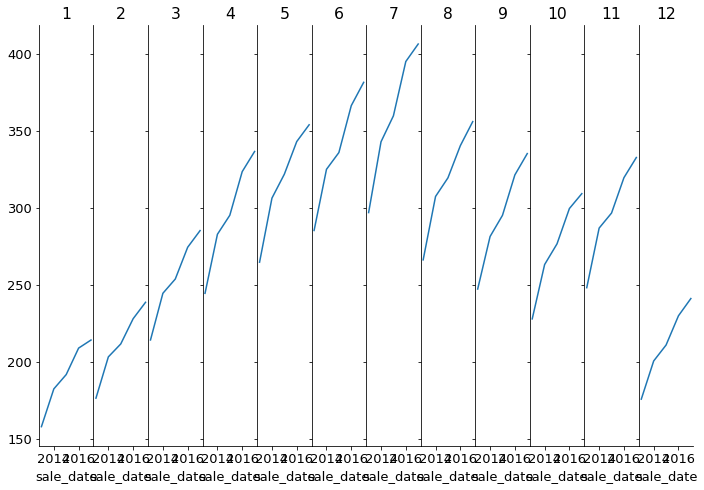

In [20]:
fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, df.groupby([df.index.year, df.index.month]).sales_total.mean().unstack().iteritems()):
    x.plot(ax=ax, title=month, figsize=(10,7))
fig.tight_layout()
fig.subplots_adjust(wspace=0)

In [21]:
import statsmodels.api as sm

In [22]:
x = df.sales_total.resample('W').mean()

In [23]:
# using statsmodels
result = sm.tsa.seasonal_decompose(x, model='additive')
result = pd.DataFrame(dict(
    observed=result.observed,
    residual=result.resid,
    seasonal=result.seasonal,
    trend=result.trend
))

In [24]:
result

,observed,residual,seasonal,trend
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-79.093974,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-82.822344,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-83.626435,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-84.095204,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-82.120101,NaN
...,...,...,...,...
2017-12-03 00:00:00+00:00,287.470043,NaN,-63.325301,NaN
2017-12-10 00:00:00+00:00,237.313469,NaN,-74.808926,NaN
2017-12-17 00:00:00+00:00,238.363226,NaN,-75.254956,NaN


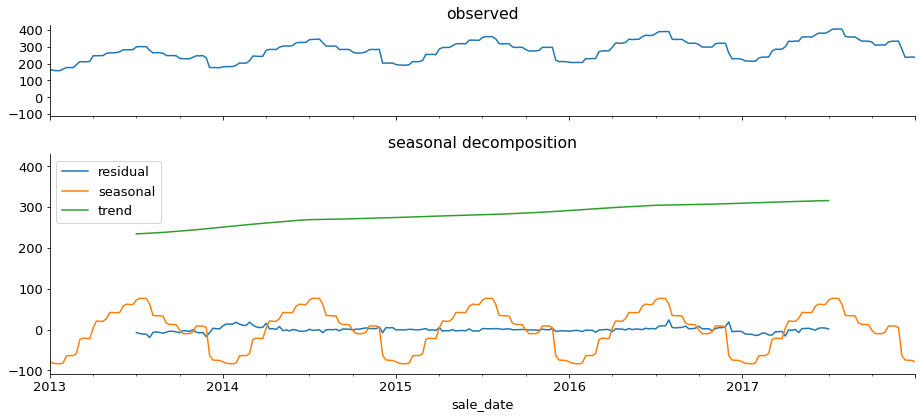

In [25]:
gs = plt.GridSpec(3, 1)
fig = plt.figure()
ax1 = fig.add_subplot(gs[1:])
ax2 = fig.add_subplot(gs[0], sharex=ax1, sharey=ax1)
result.iloc[:, 1:].plot(ax=ax1, title='seasonal decomposition')
result.observed.plot(ax=ax2, title='observed')
fig.tight_layout()

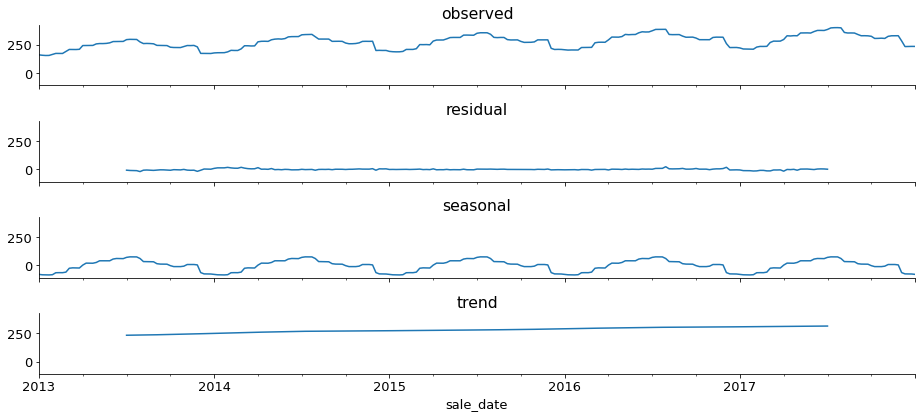

In [26]:
fig, axs = plt.subplots(4, 1, sharex=True, sharey=True)
for ax, (col, x) in zip(axs, result.iteritems()):
    x.plot(ax=ax, title=col)
fig.tight_layout()

---

In [27]:
df=pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [28]:
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [29]:
# set sale_date column to datetime format
df.Date = pd.to_datetime(df.Date)

# Set index
df = df.set_index('Date').sort_index()

In [30]:
df.Wind.fillna(0, inplace=True)
df.Solar.fillna(0, inplace=True)
df['Wind+Solar'] = df.Wind + df.Solar

<AxesSubplot:xlabel='Date'>

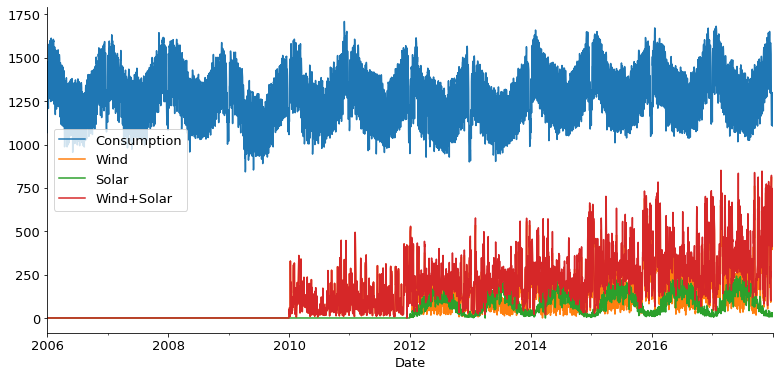

In [31]:
df.plot()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2007-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2008-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2009-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2010-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2011-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2012-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2013-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"
2014-12-31,"AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)","AxesSubplot(0.125,0.125;0.775x0.755)"


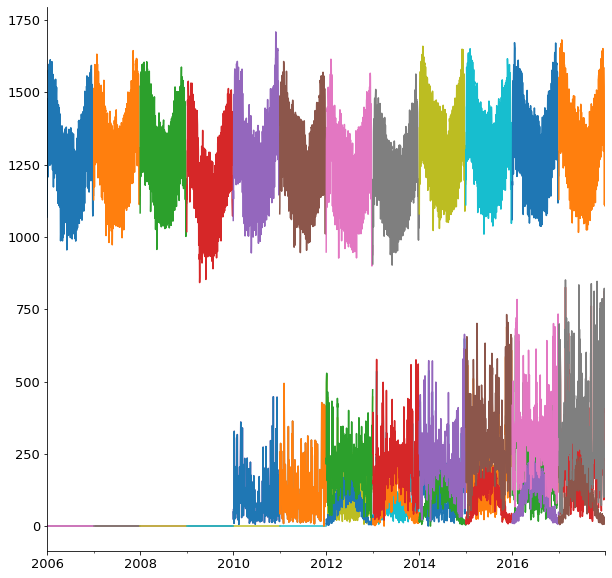

In [32]:
plt.figure(figsize=(10,10))
df.resample('Y').plot()

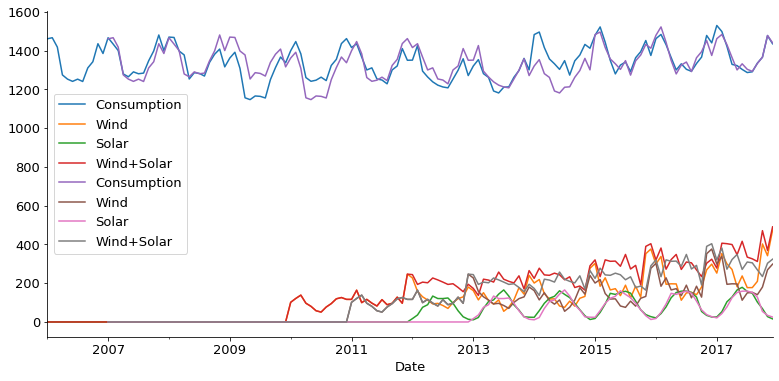

In [33]:
ax =df.resample('M').mean().plot(label='Monthly')
df.resample('M').mean().shift(12).plot(label='1 Year Ago', ax=ax)
ax.legend()

AttributeError: 'DataFrame' object has no attribute 'sales_total'

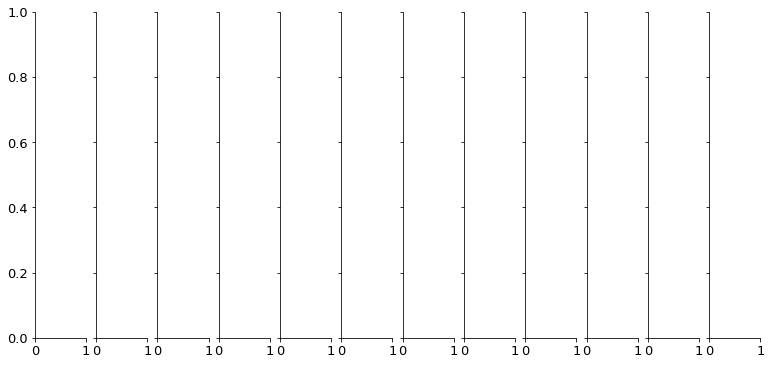

In [34]:

fig, axs = plt.subplots(1, 12, sharex=True, sharey=True)
for ax, (month, x) in zip(axs, df.sales_total.groupby([s.index.year, s.index.month]).mean().unstack().iteritems()):
    x.plot(ax=ax, title=month)
fig.tight_layout()
fig.subplots_adjust(wspace=0)